In [307]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.utils.vis_utils import plot_model


In [280]:
from src.keras.model import GAN, GAN_CNN

In [14]:
#%load_ext autoreload
%autoreload 2

In [72]:
def plot_mnist_data(images):
    for i in range(len(images)):  
        plt.subplot(330 + 1 + i)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.show()

## Model

In [312]:
gan_model = GAN_CNN()

Hello 3
Hello cnn


In [313]:
gan_model.compile(
    d_optimizer=Adam(learning_rate=3e-4),
    g_optimizer=Adam(learning_rate=3e-4),
    loss_fn=BinaryCrossentropy(),
)

In [314]:
gan_model.generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 6272)              809088    
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_15 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_76 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_31 (Conv2D  (None, 28, 28, 128)      262272    
 Transpose)                                              

In [315]:
noise = gan_model.sample_random_noise(9)

In [323]:
image_noise = noise.numpy().reshape(9, 28, 28)
image_noise = image_noise
plot_mnist_data(image_noise)

ValueError: cannot reshape array of size 1152 into shape (9,28,28)

In [324]:
image_noise.shape

(9, 128)

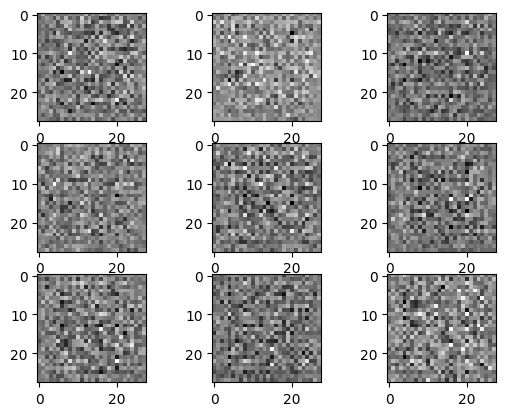

In [325]:
gan_g_output = gan_model.generator(noise)
gan_g_output = gan_g_output.numpy()#.reshape(9, 28, 28)
plot_mnist_data(gan_g_output)

In [321]:
gan_g_output.shape

(9, 28, 28, 1)

In [326]:
gan_model.discriminator(gan_g_output)

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[-0.05997276],
       [-0.06104072],
       [-0.06011989],
       [-0.05986188],
       [-0.06007076],
       [-0.06050023],
       [-0.05977833],
       [-0.05998752],
       [-0.06023204]], dtype=float32)>

## CNN Model

In [364]:
gan_model = GAN_CNN()

Hello 3
Hello cnn


In [365]:
gan_model.generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 6272)              809088    
                                                                 
 leaky_re_lu_145 (LeakyReLU)  (None, 6272)             0         
                                                                 
 reshape_29 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_58 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_146 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                                 
 conv2d_transpose_59 (Conv2D  (None, 28, 28, 128)      262272    
 Transpose)                                              

In [366]:
gan_model.discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_148 (LeakyReLU)  (None, 14, 14, 64)       0         
                                                                 
 conv2d_89 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_149 (LeakyReLU)  (None, 7, 7, 128)        0         
                                                                 
 global_max_pooling2d_29 (Gl  (None, 128)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_155 (Dense)           (None, 1)                 129       
                                                     

## Prep Data

In [330]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

print(f"MNIST Train Set: {x_train.shape}")
print(f"MNIST Test Set: {x_test.shape}")

MNIST Train Set: (60000, 28, 28)
MNIST Test Set: (10000, 28, 28)


In [347]:
# combine train / test data
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

input_shape = (-1, 28, 28, 1)
all_digits = all_digits.astype("float32") / 255.0  
all_digits = np.reshape(all_digits, input_shape)

In [348]:
# tensorflow dataset
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

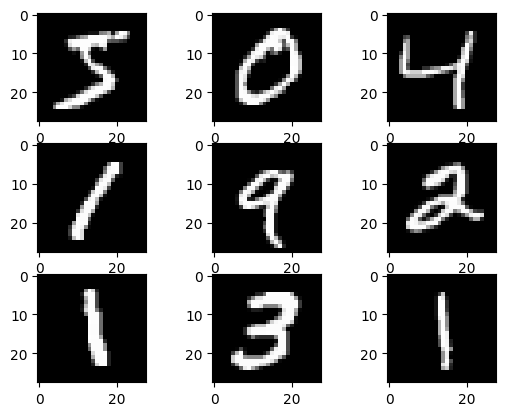

In [351]:
plot_mnist_data(all_digits[0:9])

## Train GAN

In [378]:
gan_model = GAN_CNN()
gan_model.compile(
    d_optimizer=Adam(learning_rate=3e-4),
    g_optimizer=Adam(learning_rate=3e-4),
    loss_fn=BinaryCrossentropy(),
)

Hello 3
Hello cnn


In [379]:
from datetime import datetime
print(datetime.now())

2022-09-14 22:29:28.515629


In [380]:
gan_model.fit(dataset, epochs=20)

Epoch 1/20
1094/1094 [==============================] - 719s 657ms/step - d_loss: 0.5206 - g_loss: 1.1256
Epoch 2/20
1094/1094 [==============================] - 720s 658ms/step - d_loss: 0.1354 - g_loss: 4.1189
Epoch 3/20
1094/1094 [==============================] - 735s 672ms/step - d_loss: 0.0521 - g_loss: 6.7016
Epoch 4/20
1094/1094 [==============================] - 736s 673ms/step - d_loss: 0.1041 - g_loss: 3.1665
Epoch 5/20
1094/1094 [==============================] - 731s 668ms/step - d_loss: 0.4937 - g_loss: 1.5000
Epoch 6/20
1094/1094 [==============================] - 713s 652ms/step - d_loss: 0.5857 - g_loss: 1.0013
Epoch 7/20
1094/1094 [==============================] - 718s 657ms/step - d_loss: 0.5762 - g_loss: 1.0052
Epoch 8/20
1094/1094 [==============================] - 734s 671ms/step - d_loss: 0.5645 - g_loss: 1.0588
Epoch 9/20
1094/1094 [==============================] - 737s 673ms/step - d_loss: 0.5722 - g_loss: 1.0251
Epoch 10/20
1094/1094 [=======================

In [381]:
print(datetime.now())

2022-09-15 02:32:24.101357


### Test model

In [382]:
noise = gan_model.sample_random_noise(9)

In [383]:
#image_noise = noise.numpy().reshape(9, 28, 28)
# plot_mnist_data(image_noise)

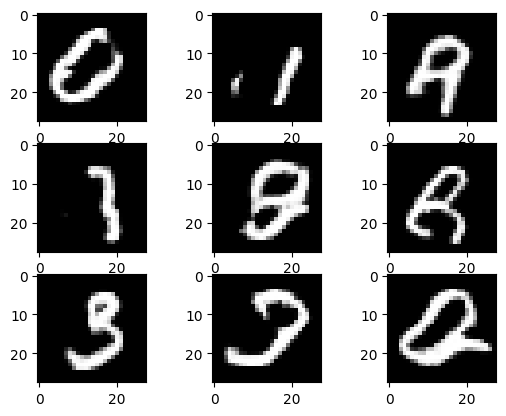

In [384]:
gan_g_output = gan_model.generator(noise)
gan_g_reshaped = gan_g_output.numpy()#.reshape(9, 28, 28)
plot_mnist_data(gan_g_reshaped)

In [385]:
gan_model.discriminator(gan_g_reshaped)

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[0.60915357],
       [0.43351775],
       [0.43775463],
       [0.265298  ],
       [0.26028347],
       [0.5656398 ],
       [0.37103817],
       [0.64274824],
       [0.38933513]], dtype=float32)>

In [386]:
gan_model.discriminator(all_digits[0:9])

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[0.67144245],
       [0.5077027 ],
       [0.6165581 ],
       [0.9206183 ],
       [0.31056586],
       [0.8072517 ],
       [0.7723774 ],
       [0.41536987],
       [0.68740493]], dtype=float32)>